# This notebook is for creating the plots for the DOE PI meeting poster

In [2]:
# importing the libraries I will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
cm = plt.cm.get_cmap('YlGnBu_r')

### Sediment deposition vs Hyporheic flux plots

In [6]:
# setting my color palete
hex_color = ["#0c2c84", "#225ea8", "#1d91c0", "#41b6c4", "#7fcdbb", "#c7e9b4", "#edf8b1", "#ffffd9"]
rgb_color_palete = [tuple(int(hex_color[i:i+2], 16)/255. for i in (1, 3, 5)) for hex_color in hex_color]  # convert each hexadecimal to RGB

spring_closed_sedvolume = [47.0143, 29.5542, 47.4885, 38.7847, 54.7466, 27.5703, 63.3849, 31.8675, 21.8202, 17.0562 ,23.9974, 35.0432]
spring_open_sedvolume = [27.5283, 14.5052, 71.6942 ,47.3122 ,31.8106 ,24.1521 ,62.8405 ,29.1807 ,25.1962 ,14.8794 ,31.2583]
spring_closed_hypflux = [0.24, 0.24, -0.29, -0.08, 0.07, 0.07, -0.03, -0.03, -0.09, -0.09, -0.03, -0.03]
spring_open_hypflux = [0.24, 0.24, -0.29, -0.08, 0.07, 0.07, -0.03, -0.03, -0.09, -0.09, -0.03]
closed_vx = [0.7576, 0.6086, 1.3111, 0.7064, 1.2174, 1.1706, 1.5179, 1.2053, 0.0753, 0.1672, 1.3153, 1.1772]
open_vx = [0.7568, 0.6082, 1.3120, 0.7130, 1.2174, 1.1706, 1.5179, 1.2053, 0.0753, 0.1672, 1.1772]

# converting to dataframe and deleting the original lists
spring_closed_baskets = pd.DataFrame({'closed_sed': spring_closed_sedvolume, 'closed_hypflux': spring_closed_hypflux, 'h_velocity': closed_vx})
spring_open_baskets = pd.DataFrame({'open_sed': spring_open_sedvolume, 'open_hypflux': spring_open_hypflux, 'h_velocity': open_vx})
del spring_closed_sedvolume, spring_open_sedvolume, spring_closed_hypflux, spring_open_hypflux

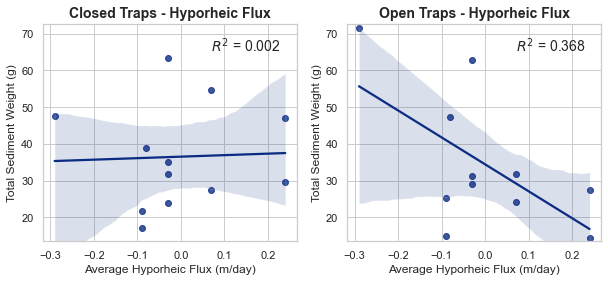

In [11]:
y_min = min(spring_closed_baskets['closed_sed'].min(), spring_open_baskets['open_sed'].min())
y_max = max(spring_closed_baskets['closed_sed'].max(), spring_open_baskets['open_sed'].max())

plt.figure(figsize=(10, 4))
sns.set(style='whitegrid')
plt.subplot(1, 2, 1)
sns.regplot(x='closed_hypflux', y='closed_sed', data=spring_closed_baskets, color=rgb_color_palete[0])
plt.ylim(y_min-1, y_max+1)  
plt.title('Closed Traps - Hyporheic Flux', fontsize=14, fontweight='bold')
plt.xlabel('Average Hyporheic Flux (m/day)')
plt.ylabel('Total Sediment Weight (g)')
slope, intercept, r_value, p_value, std_err = stats.linregress(spring_closed_baskets['closed_hypflux'], spring_closed_baskets['closed_sed'])
plt.text(0.8, 0.9, r'$R^2$' + ' = %0.3f' % r_value**2, ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)

plt.subplot(1, 2, 2)
sns.regplot(x='open_hypflux', y='open_sed', data=spring_open_baskets, color=rgb_color_palete[0])
plt.ylim(y_min-1, y_max+1)  # Set y-axis limits
plt.title('Open Traps - Hyporheic Flux', fontsize=14, fontweight='bold')
plt.xlabel('Average Hyporheic Flux (m/day)')
plt.ylabel('Total Sediment Weight (g)')
slope, intercept, r_value, p_value, std_err = stats.linregress(spring_open_baskets['open_hypflux'], spring_open_baskets['open_sed'])
plt.text(0.8, 0.9, r'$R^2$' + ' = %0.3f' % r_value**2, ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)

plt.savefig('spring_sediment_vs_flux.png', dpi=300, bbox_inches='tight')
plt.show()

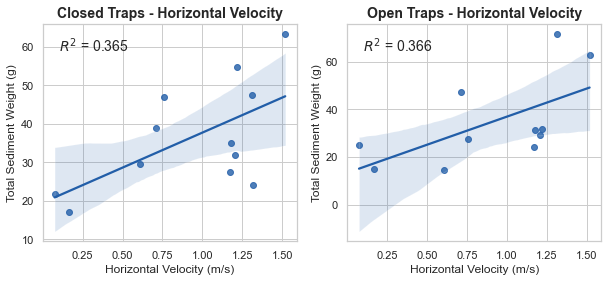

In [20]:
y_min = min(spring_closed_baskets['h_velocity'].min(), spring_open_baskets['h_velocity'].min())
y_max = max(spring_closed_baskets['h_velocity'].max(), spring_open_baskets['h_velocity'].max())

plt.figure(figsize=(10, 4))
sns.set(style='whitegrid')
plt.subplot(1, 2, 1)
sns.regplot(x='h_velocity', y='closed_sed', data=spring_closed_baskets, color=rgb_color_palete[1])
#plt.ylim(y_min-1, y_max+1)  
plt.title('Closed Traps - Horizontal Velocity', fontsize=14, fontweight='bold')
plt.xlabel('Horizontal Velocity (m/s)')
plt.ylabel('Total Sediment Weight (g)')
slope, intercept, r_value, p_value, std_err = stats.linregress(spring_closed_baskets['h_velocity'], spring_closed_baskets['closed_sed'])
plt.text(0.2, 0.9, r'$R^2$' + ' = %0.3f' % r_value**2, ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)

plt.subplot(1, 2, 2)
sns.regplot(x='h_velocity', y='open_sed', data=spring_open_baskets, color=rgb_color_palete[1])
#plt.ylim(y_min-1, y_max+1)  # Set y-axis limits
plt.title('Open Traps - Horizontal Velocity', fontsize=14, fontweight='bold')
plt.xlabel('Horizontal Velocity (m/s)')
plt.ylabel('Total Sediment Weight (g)')
slope, intercept, r_value, p_value, std_err = stats.linregress(spring_open_baskets['h_velocity'], spring_open_baskets['open_sed'])
plt.text(0.2, 0.9, r'$R^2$' + ' = %0.3f' % r_value**2, ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)

plt.savefig('spring_velocity_vs_flux.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
summer_closed_sedvolume = [11.3989, 8.511, 10.304, 19.3034, 20.0314, 16.9806, 15.0569, 12.7844, 12.4433, 12.441, 13.623]
summer_open_sedvolume = [12.6114, 16.5716, 15.135, 4.6359, 14.8985, 16.9806, 17.6498, 8.8272, 13.1127, 9.672, 13.8108]
summer_closed_hypflux = [-0.0238,-0.0238, -0.2908, -0.2766, 0.1538, 0.1538, -0.0187, -0.0725, -0.0725, -0.0261, -0.0261]
summer_open_hypflux = [-0.0238, -0.0238, -0.2908, -0.2766, 0.1538, 0.1538, -0.0187, -0.0187, -0.0725, -0.0725, -0.0261]

# converting to dataframe and deleting the original lists
summer_closed_baskets = pd.DataFrame({'closed_sed': summer_closed_sedvolume, 'closed_hypflux': summer_closed_hypflux})
summer_open_baskets = pd.DataFrame({'open_sed': summer_open_sedvolume, 'open_hypflux': summer_open_hypflux})
del summer_closed_sedvolume, summer_open_sedvolume, summer_closed_hypflux, summer_open_hypflux

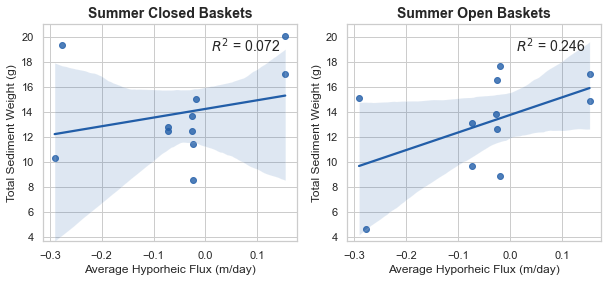

In [10]:
y_min = min(summer_closed_baskets['closed_sed'].min(), summer_open_baskets['open_sed'].min())
y_max = max(summer_closed_baskets['closed_sed'].max(), summer_open_baskets['open_sed'].max())

plt.figure(figsize=(10, 4))
sns.set(style='whitegrid')
plt.subplot(1, 2, 1)
sns.regplot(x='closed_hypflux', y='closed_sed', data=summer_closed_baskets, color=rgb_color_palete[1])
plt.ylim(y_min-1, y_max+1)  
plt.title('Summer Closed Baskets', fontsize=14, fontweight='bold')
plt.xlabel('Average Hyporheic Flux (m/day)')
plt.ylabel('Total Sediment Weight (g)')
slope, intercept, r_value, p_value, std_err = stats.linregress(summer_closed_baskets['closed_hypflux'], summer_closed_baskets['closed_sed'])
plt.text(0.8, 0.9, r'$R^2$' + ' = %0.3f' % r_value**2, ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)

plt.subplot(1, 2, 2)
sns.regplot(x='open_hypflux', y='open_sed', data=summer_open_baskets, color=rgb_color_palete[1])
plt.ylim(y_min-1, y_max+1)  # Set y-axis limits
plt.title('Summer Open Baskets', fontsize=14, fontweight='bold')
plt.xlabel('Average Hyporheic Flux (m/day)')
plt.ylabel('Total Sediment Weight (g)')
slope, intercept, r_value, p_value, std_err = stats.linregress(summer_open_baskets['open_hypflux'], summer_open_baskets['open_sed'])
plt.text(0.8, 0.9, r'$R^2$' + ' = %0.3f' % r_value**2, ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)

plt.savefig('summer_sediment_vs_flux.png', dpi=300, bbox_inches='tight')
plt.show()

### Sinuous diel plot to show hyporheic flux

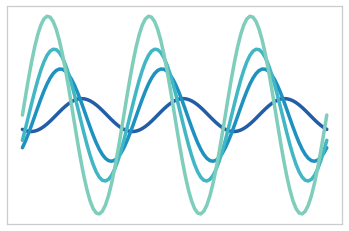

In [7]:
# create an array of x values from 0 to 5*pi
x = np.linspace(0, 6 * np.pi, 100)
amplitudes = [0.25, 0.7, 1.0, 1.5]
phase_shifts = [np.pi/1.5, np.pi/4, np.pi/8, 0]
# plot a sine wave for each amplitude
for i, amplitude in enumerate(amplitudes):
    plt.plot(x, amplitude * np.sin(x - phase_shifts[i]), color=rgb_color_palete[i+1], label=f'Amplitude = {amplitude}', linewidth=3.5)
# hide x and y labels and ticks
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.savefig('sine_wave.png', dpi=300, bbox_inches='tight')
plt.show()

## Spring vs Summer Fine Sediment Deposition

In [44]:
sp_vs_sm = pd.read_csv('sp_vs_sm_metrics.csv')
spring = pd.read_csv('spring_concD50.csv')
summer = pd.read_csv('summer_concD50.csv')

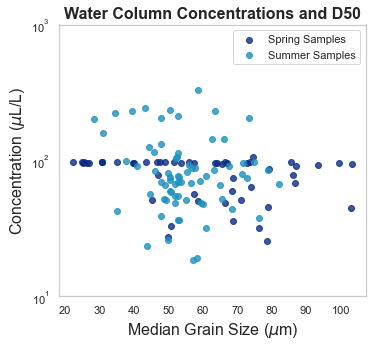

In [45]:
plt.figure(figsize=(5.5, 5))
sns.set_style('whitegrid')
sns.regplot(x='D50', y='Concentration (mg/L)', data=spring, color=rgb_color_palete[0], label='Spring Samples', ci=None, fit_reg=False)
sns.regplot(x='D50', y='Concentration (mg/L)', data=summer, color=rgb_color_palete[2], label='Summer Samples', ci=None, fit_reg=False)
plt.ylim(10, 1000)  
plt.title('Water Column Concentrations and D50', fontsize=16, fontweight='bold')
plt.xlabel('Median Grain Size ($\mu$m)', fontsize=16)
plt.ylabel('Concentration ($\mu$L/L)', fontsize=16)
plt.yscale('log')
plt.legend()
plt.grid(False)

plt.savefig('spring_vs_summer_concD50.png', dpi=300, bbox_inches='tight')
plt.show()